<a href="https://colab.research.google.com/github/thaicoh/Nhom12_HocMay_CNTT1/blob/main/Nh%C3%B3m_12_Airline_Passenger_Satisfaction_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1 | Preprocessing Steps</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#016CC9'> Import Libraries</span></b>  

In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#016CC9'> Import Files</span></b>    

In [ ]:
df = pd.read_csv("/content/sample_data/train.csv")
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2 | Dataframe Investigation</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#016CC9'> Basic Steps</span></b>

In [ ]:
df.shape

(103904, 24)

In [ ]:
pd.value_counts(df.dtypes)

int64      18
object      5
float64     1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
# Loại bỏ cột không cần thiết
columns_to_drop = ['Inflight wifi service', 'Online boarding', 'Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Leg room service']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Chuyển đổi dữ liệu chuỗi sang dạng số
df.replace({'Gender': {'Male': 1, 'Female': 2},
            'Customer Type': {'Loyal Customer': 1, 'disloyal Customer': 2},
              'Type of Travel': {'Personal Travel': 1, 'Business travel': 2},
              'satisfaction': {'neutral or dissatisfied': 1, 'satisfied': 2},
              'Class': {'Eco Plus': 1, 'Business': 2, 'Eco': 3}}, inplace=True)

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,1,13,1,1,460,4,3,1,5,4,4,5,5,25,18.0,1
1,5047,1,2,25,2,2,235,2,3,3,1,3,1,4,1,1,6.0,1
2,110028,2,1,26,2,2,1142,2,2,2,5,4,4,4,5,0,0.0,2
3,24026,2,1,25,2,2,562,5,5,5,2,3,1,4,2,11,9.0,1
4,119299,1,1,61,2,2,214,3,3,3,4,4,3,3,3,0,0.0,2



### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#016CC9'> Data preprocessing</span></b>

 + Id: Mã số của khách hàng
 + Gender: Giới tính của khách hàng
 + Customer Type: Phân loại khách hàng
 + Age: Độ tuổi khách hàng
 + Type of travel: Loại chuyến bay
 + Class: Hạng vé máy bay
 + Flight Distance: Quãng đường bay
 + Departure/Arrival time: convenient:Thời gian khởi hành và hạ cánh
 + Ease of Online booking: Đặt vé trực tuyến
 + Gate location: Vị trí cổng
 + Food and drink: Đồ ăn và nước uống
 + Baggage handling: Hành lý xách tay
 + Checkin service: Dịch vụ đăng ký
 + Inflight service:Dịch vụ khi bay
 + Cleanliness: Vệ sinh
 + Departure Delay in Minutes: Thời gian hoãn chuyến bay khi khởi hành
 + Arrival Delay in Minutes: Thời gian trễ khi hạ cánh
 + satisfaction: Mức độ hài lòng


In [ ]:
df.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,64924.210502,1.507459,1.182678,39.379706,1.689627,2.377762,1189.448375,3.060296,2.756901,2.976883,3.202129,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,1.433333
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.615882,997.147281,1.525075,1.398929,1.277621,1.329533,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32533.750000,1.000000,1.000000,27.000000,1.000000,2.000000,414.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000
50%,64856.500000,2.000000,1.000000,40.000000,2.000000,2.000000,843.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000
75%,97368.250000,2.000000,1.000000,51.000000,2.000000,3.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,2.000000
max,129880.000000,2.000000,2.000000,85.000000,2.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,2.000000



### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#016CC9'> Define target variables </span></b>

In [ ]:
#biến mục tiêu
print("Mô tả giá trị trong cột satisfaction: ")
df['satisfaction'].describe()

Mô tả giá trị trong cột satisfaction: 


count    103904.000000
mean          1.433333
std           0.495538
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: satisfaction, dtype: float64


### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#016CC9'> Handling missing data and normalizing </span></b>

In [ ]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### <b><span style='color:#DEB078'>2.4 |</span><span style='color:#016CC9'> Value Behaviour</span></b>


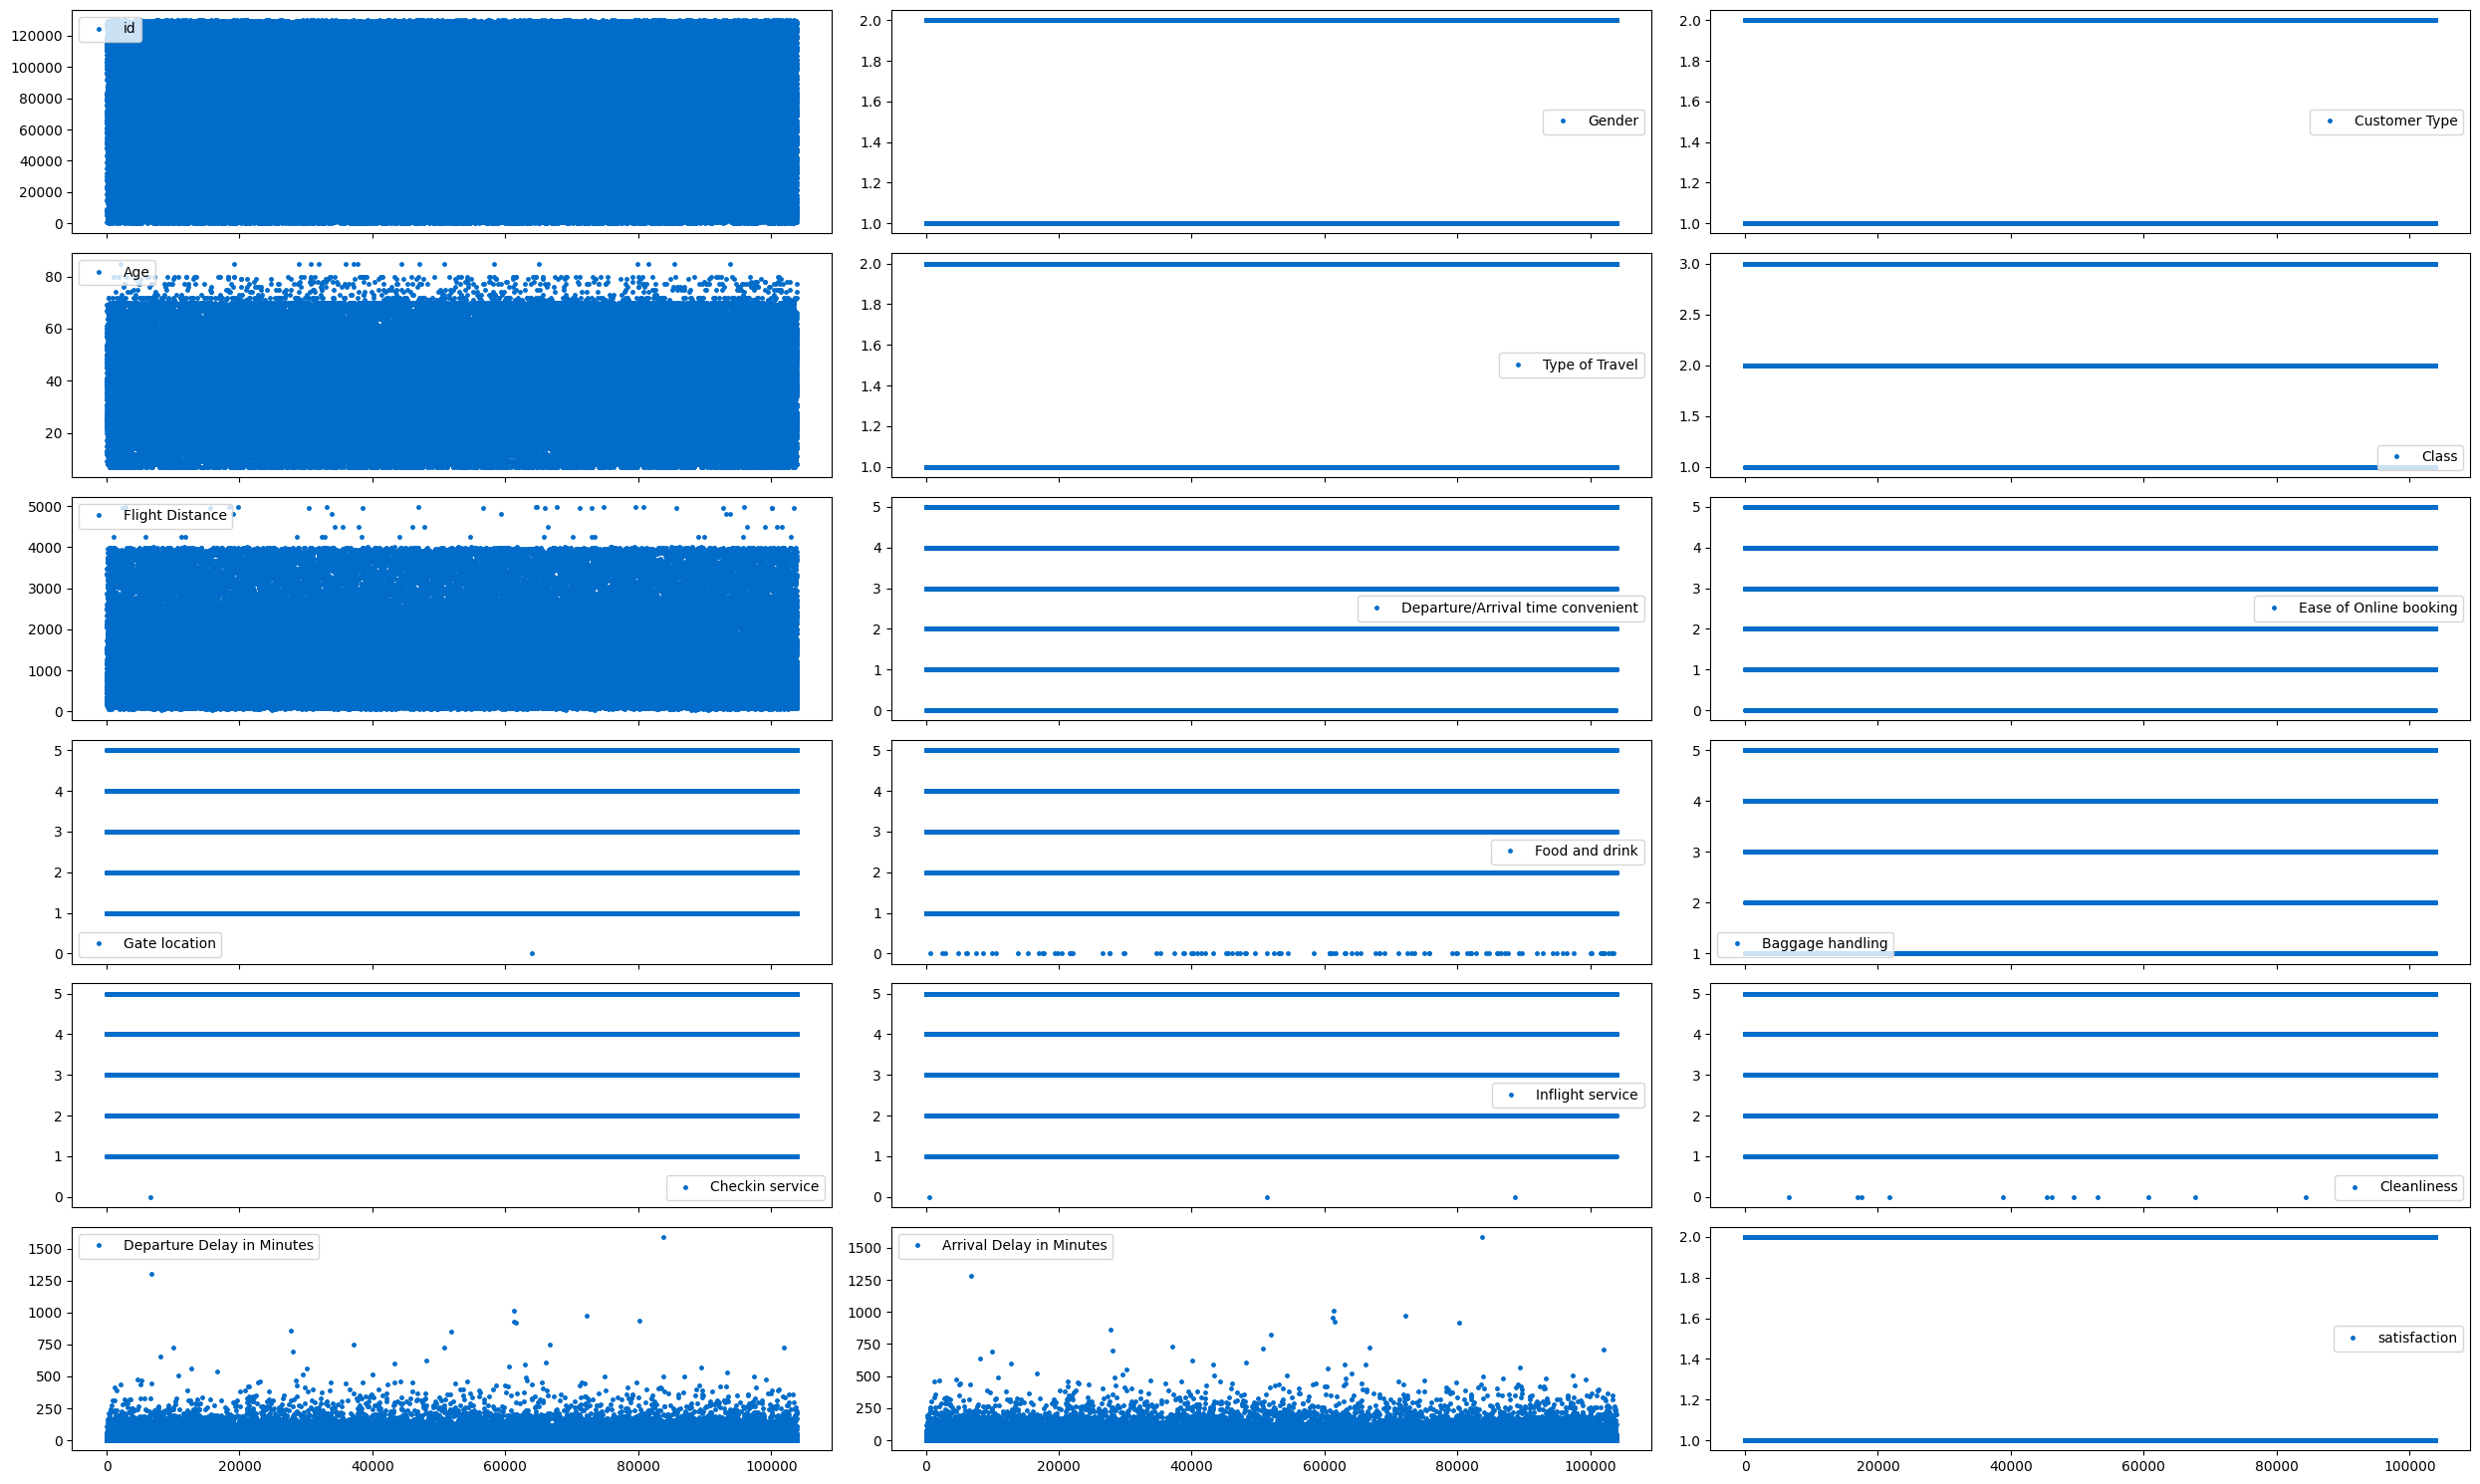

In [ ]:
# For all Numerical columnn for all rows
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(25,15), markersize=5,color='#016CC9')
plt.tight_layout()

In [ ]:
df[['satisfaction']]=df[['satisfaction']].astype('str')

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3 | Univariate Analysis</div></b>  

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#016CC9'> Target Variable</span></b>

In [ ]:
#biến mục tiêu
df[['satisfaction']].value_counts(normalize=True).round(decimals=3)*100

satisfaction
1               56.7
2               43.3
dtype: float64

In [ ]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12),
                           height=500, width=1000))

In [ ]:
target=df[['satisfaction']].value_counts(normalize=True).round(decimals=3)*100


pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5,
                     showlegend=True,sort=False,
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Income: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution',
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4 | Multivariate Analysis</div></b>





### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#016CC9'> Target variable Relation with Categorical variables</span></b>

In [ ]:
#Biến mục tiêu Mối quan hệ với các biến phân loại
df.select_dtypes(exclude='number').columns[:-1]

Index([], dtype='object')

In [ ]:
# Chức năng trợ giúp để lấy % cho các danh mục và tổng thể

def stats(x):
    temp1=(df[[x,'satisfaction']].value_counts(normalize=True).round(decimals=3)*100).reset_index().rename(columns={0:'Overall_Percent'})
    Coloumn_To_Aggregate=[x,'satisfaction']
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'),
                 df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Category_Percent']=round((df6['ind_siz']/df6['Total'])*100 ,2)
    temp2=df6[[x,'satisfaction','Category_Percent']]
    temp3=temp1.merge(temp2,on=[x,'satisfaction'])
    return temp3.pivot(columns=x,index='satisfaction')

#### Gender


In [ ]:
px.histogram(df, x='Gender', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('Gender')

Overall_Percent       Category_Percent       
Gender                     1     2                1      2
satisfaction                                              
1                       27.6  29.1            56.05  57.26
2                       21.6  21.7            43.95  42.74

***
--Overall
* 56.7 % (neutral or dissatisfied) -> 29.1 % were from Female background
* 43.3 % (satisfied) -> 21.7 % were from Female background

***
--Category wise
* 43.95 % of people with Male gender were satisfied
* 43.74 % of people with Female gender were satisfied
***


#### Age

In [ ]:
px.histogram(df, x='Age', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

***

Tỷ lệ khách hàng không hài lòng:

* 10-20 tuổi: 65,23%

* 20-30 tuổi: 62,28%

* 30-40 tuổi: 59,33%

* 40-50 tuổi: 56,38%

* 50-60 tuổi: 53,43%

* 60-70 tuổi: 50,48%

* 70-80 tuổi: 47,53%

Tỷ lệ khách hàng hài lòng:

* 10-20 tuổi: 34,77%

* 20-30 tuổi: 37,72%

* 30-40 tuổi: 40,67%

* 40-50 tuổi: 43,62%

* 50-60 tuổi: 46,57%

* 60-70 tuổi: 49,52%

* 70-80 tuổi: 52,47%


#### Customer Type

In [ ]:
px.histogram(df, x='Customer Type', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('Customer Type')

Overall_Percent       Category_Percent       
Customer Type               1     2                1      2
satisfaction                                               
1                        42.7  13.9            52.27  76.33
2                        39.0   4.3            47.73  23.67

***
--Overall
* 56.6 % (neutral or dissatisfied) -> 42.7 % were from Loyal Customer background
* 43.3 % (satisfied) -> 39.0 % were from Loyal Customer background

***
--Category wise
* 47.73 % of the form loyal customers are satisfied
* 23.67 % of the form disloyal customers are satisfied
***


#### Type of Travel

In [ ]:
px.histogram(df, x='Type of Travel', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('Type of Travel')

Overall_Percent       Category_Percent       
Type of Travel               1     2                1      2
satisfaction                                                
1                         27.9  28.8            89.83  41.74
2                          3.2  40.2            10.17  58.26

***
--Overall
* 56.7 % (neutral or dissatisfied) -> 28.8 % were from Business travel background
* 43.4 % (satisfied) -> 40.2 % were from Business travel background

***
--Category wise
* 10.17 % of the form Personal travel are satisfied
* 58.26 % of the form Business travel are satisfied
***


#### Class

In [ ]:
px.histogram(df, x='Class', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('Class')

Overall_Percent             Category_Percent              
Class                      1     2     3                1      2      3
satisfaction                                                           
1                        5.4  14.6  36.6            75.39  30.57  81.39
2                        1.8  33.2   8.4            24.61  69.43  18.61

***
--Overall
* 56.6 % (neutral or dissatisfied) -> 36.6 % were from Economy background
* 43.4 % (satisfied) -> 33.2 % were from Business background

***
--Category wise
* 24.61 % of the form Economy Plus are satisfied
* 69.43 % of the form Business are satisfied
***


#### Flight Distance

In [ ]:
px.histogram(df, x='Flight Distance', color="satisfaction", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats("Flight Distance")

Overall_Percent                                               \
Flight Distance            31   56   67   73   74   76   77   78   80   82     
satisfaction                                                                   
1                           0.0  0.0  0.1  0.0  0.0  NaN  0.0  0.0  0.0  0.0   
2                           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                 ... Category_Percent                                     \
Flight Distance  ...             3996   3997   3998   3999   4000   4243   
satisfaction     ...                                                       
1                ...             37.5  22.22    NaN    NaN   9.09  38.89   
2                ...             62.5  77.78  100.0  100.0  90.91  61.11   

                                          
Flight Distance  4502  4817   4963  4983  
satisfaction                              
1                50.0  80.0  53.85  25.0  
2                50.0  20.0  46.15  75.0  

[2 rows x 7604 columns]

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4.2 | </div></b>  

In [ ]:
df.groupby('satisfaction').mean()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,
1,64474.259176,1.512797,1.246081,37.566688,1.507974,2.550179,928.919971,3.129112,2.546850,2.976121,2.95805,3.375991,3.042952,3.388814,2.936123,16.503728,17.127536
2,65512.609928,1.500478,1.099767,41.750583,1.927174,2.152293,1530.140255,2.970305,3.031582,2.977879,3.52131,3.966396,3.646041,3.969461,3.744342,12.608084,12.630799


In [ ]:
#Số lần xuất hiện
df['satisfaction'].value_counts()

1    58879
2    45025
Name: satisfaction, dtype: int64

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5.2 | **Categorical Variable** </div></b>  



#### Satisfied vs Neutral or Dissatisfied Distribution

<Axes: title={'center': 'Count of Satisfaction'}, xlabel='satisfaction', ylabel='count'>

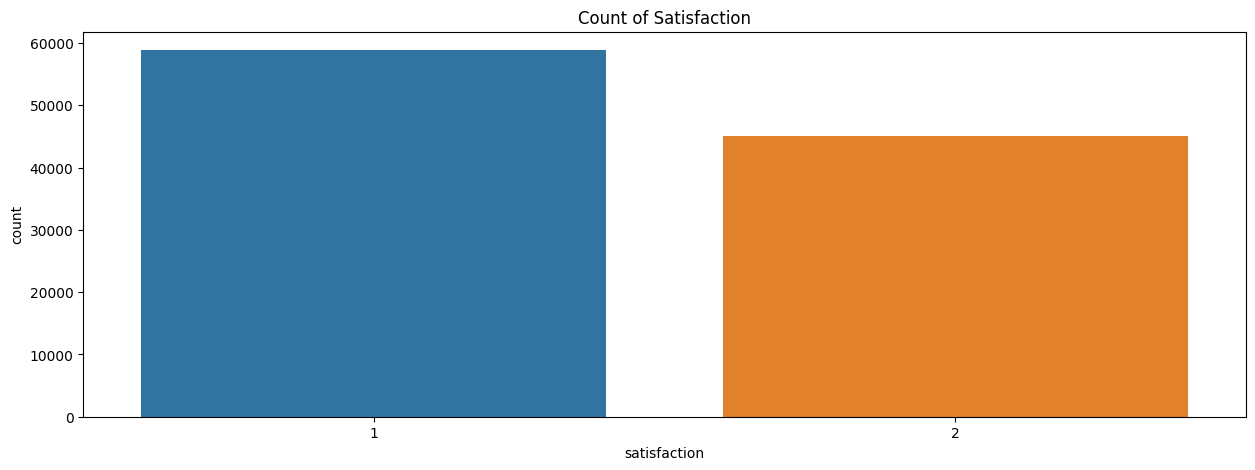

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Count of Satisfaction')
sns.countplot(data=df, x='satisfaction')

=> Tỉ lệ không hài lòng chiếm khá cao lên đến 56.67% so với sự hài lòng của hành khách chỉ chiếm 43.33%

#### Class Distribution

<Axes: title={'center': 'Count of Class'}, xlabel='Class', ylabel='count'>

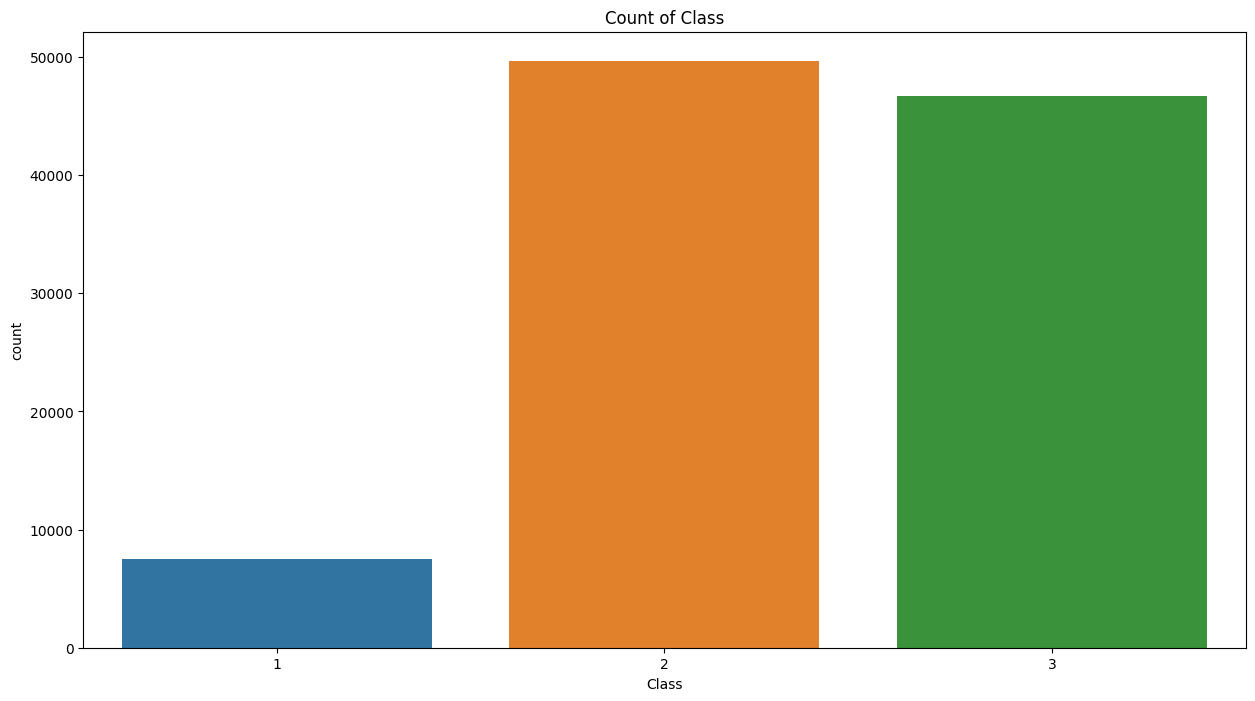

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Class')

=> Tỉ lệ lựa chọn cao nhất của hành khách là Business và thứ 2 là Eco và thấp nhất là Eco plus

#### Customer Type Distribution

<Axes: title={'center': 'Count of Customer Type'}, xlabel='Customer Type', ylabel='count'>

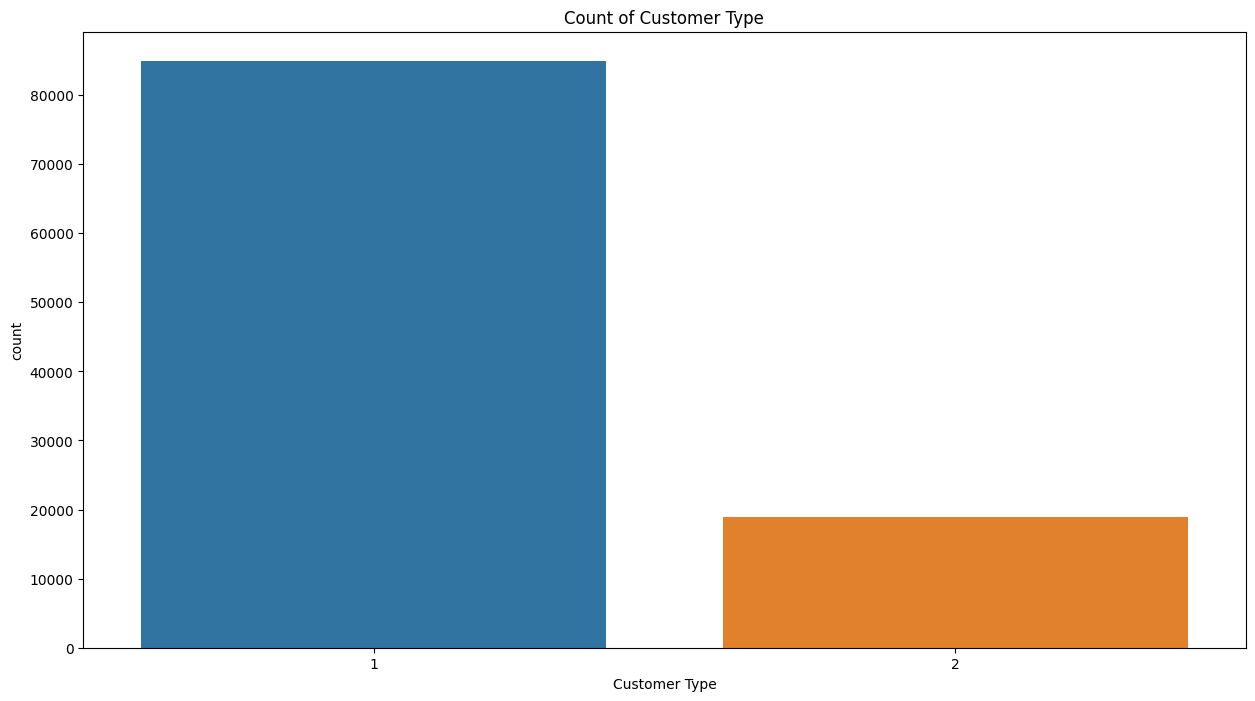

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Customer Type')
sns.countplot(data=df, x='Customer Type')

=> Tỉ lệ tập trung ở những hành khách Loyal Customer và nó chiếm tỉ lệ khá cao so với hành khác Disloyal Customer

#### Type of travel Distribution

<Axes: title={'center': 'Count of Type of Travel'}, xlabel='Type of Travel', ylabel='count'>

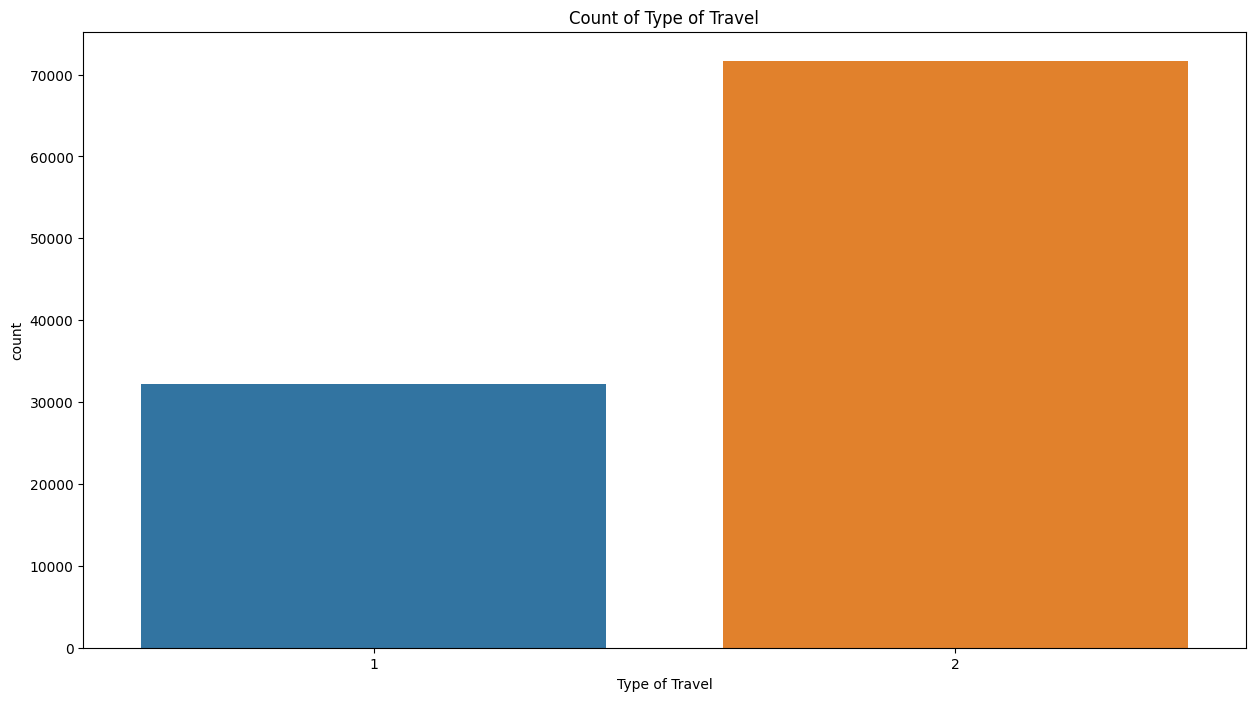

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Type of Travel')
sns.countplot(data=df, x='Type of Travel')

=> Tỉ lệ người sang nước ngoài để đi làm đi học (Business travel) chiếm khá cao hơn so với những người đi du lịch (Personal travel)

#### Flight Distribution

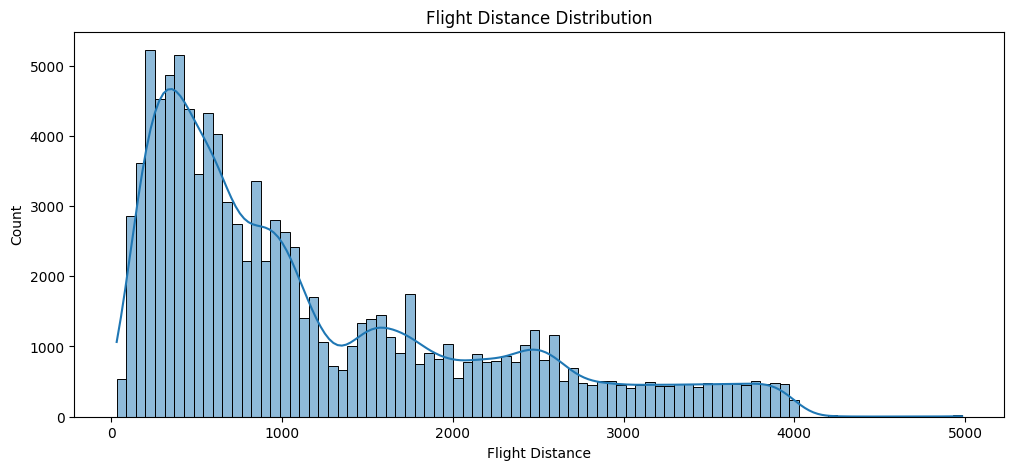

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Flight Distance', kde=True)
plt.title('Flight Distance Distribution');

#### Age Distribution

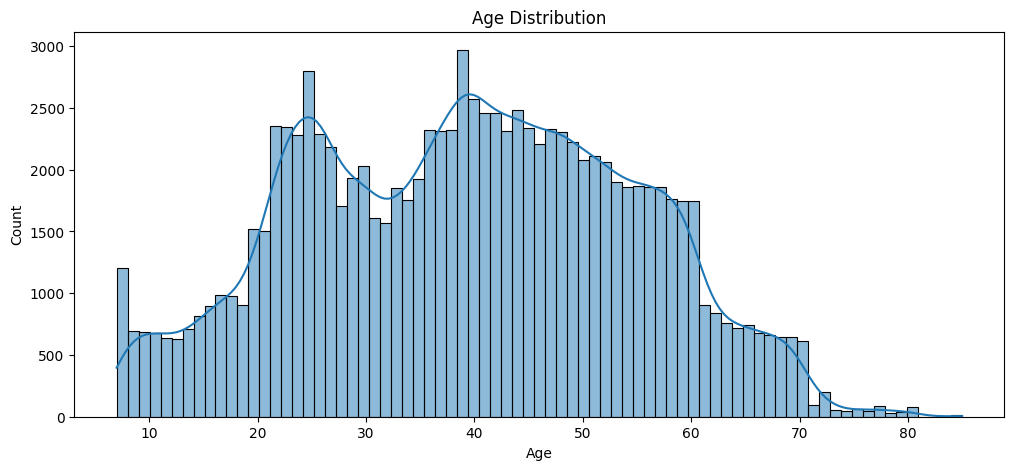

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution');
plt.show();

#### Departure/Arrival time convenient

<Axes: title={'center': 'Count of Departure/Arrival time convenient'}, xlabel='Departure/Arrival time convenient', ylabel='count'>

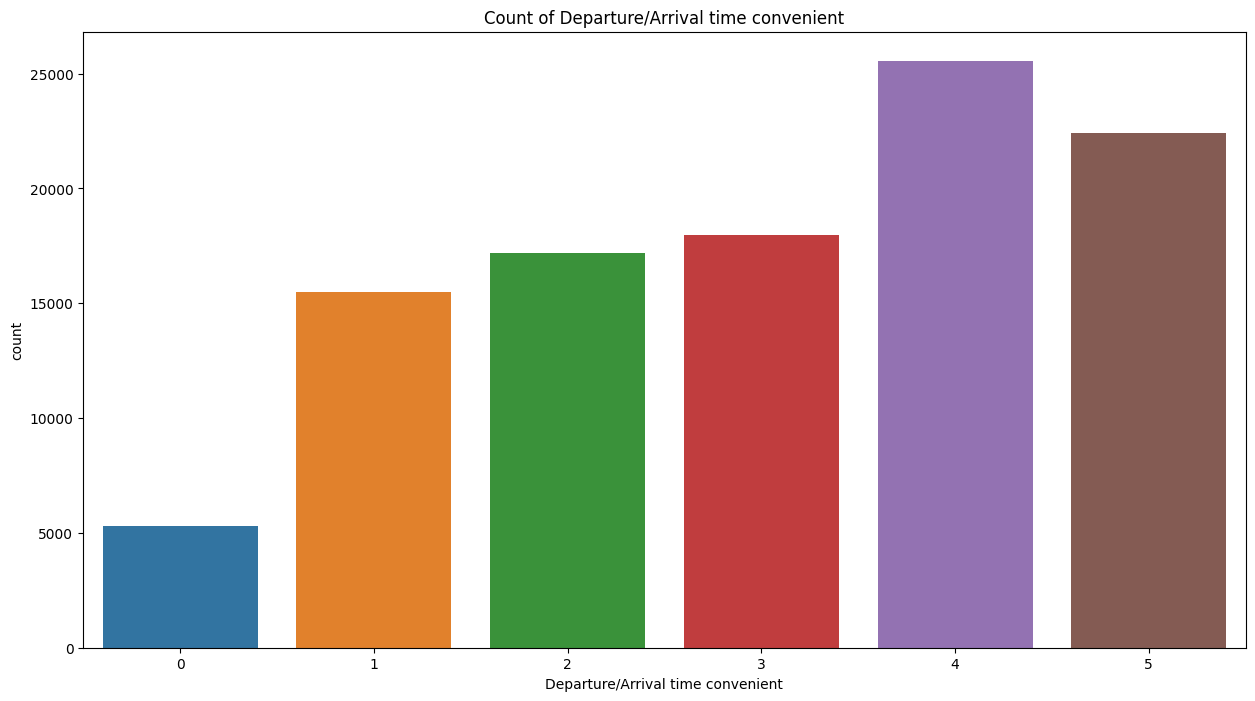

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Departure/Arrival time convenient')
sns.countplot(data=df, x='Departure/Arrival time convenient')

=> Tỉ lệ hài lòng của thời gian khởi hành và đến được đánh giá cao nhất là ở 4 là Excellent và sau đó là 5 là Very good -> cho thấy độ hài lòng về dịch vụ này là cao

#### Ease of Online booking

<Axes: title={'center': 'Count of Ease of Online booking'}, xlabel='Ease of Online booking', ylabel='count'>

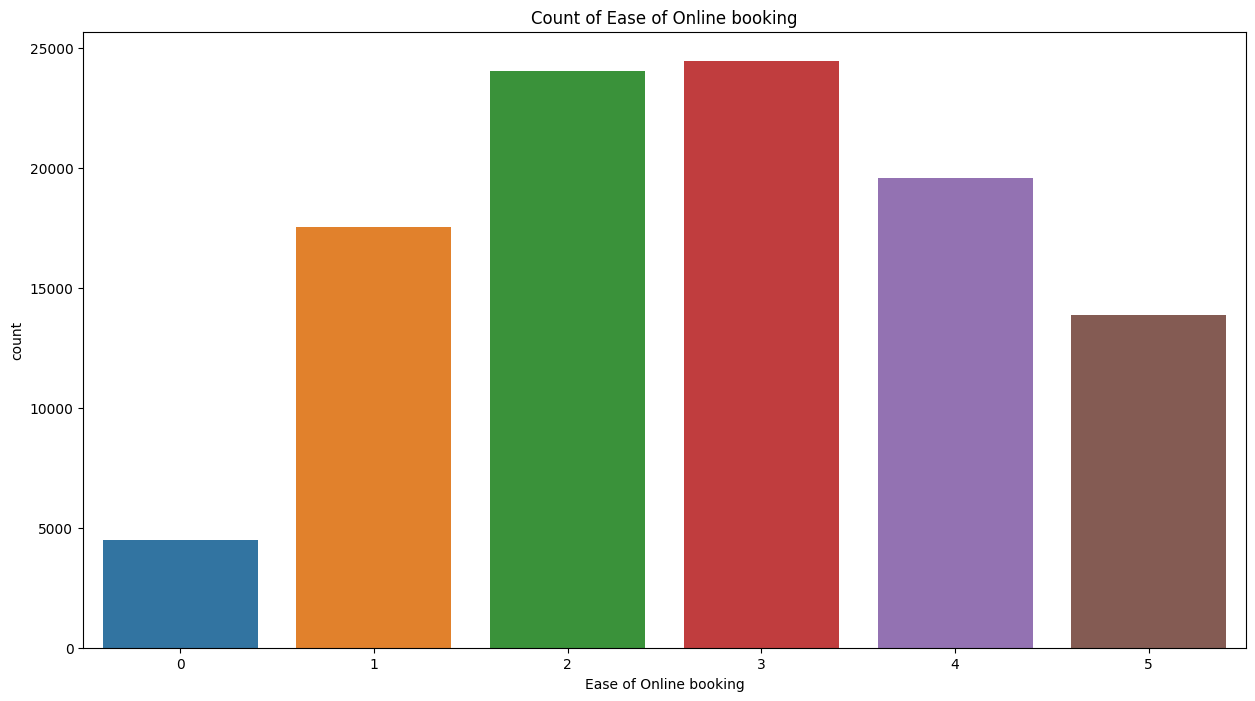

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Ease of Online booking')
sns.countplot(data=df, x='Ease of Online booking')

=> Tỉ lệ hài lòng của đặt vé trực tuyến cao nhất được vote ở 3 là Good sao và sau đó là 2 là Bad -> cho thấy sự hài lòng về đặt vé trực tuyến nằm ở mức trung bình

#### Gate location

<Axes: title={'center': 'Count of Gate location'}, xlabel='Gate location', ylabel='count'>

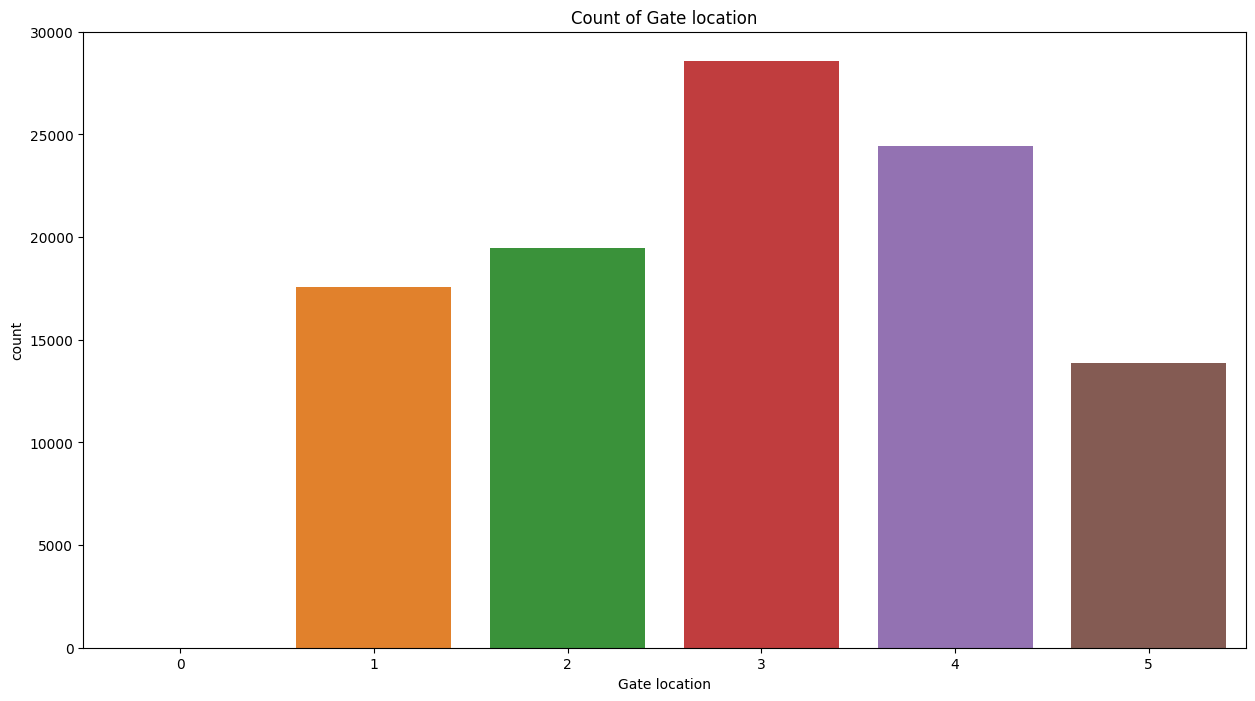

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Gate location')
sns.countplot(data=df, x='Gate location')

=> Tỉ lệ hài lòng của địa điểm cổng được vote cao nhất là 3 là Good sau đó là 4 là Excellent -> cho thấy sự hài lòng về các vị trí cổng là nằm ở mức trung bình

#### Food and drink

<Axes: title={'center': 'Count of Food and drink'}, xlabel='Food and drink', ylabel='count'>

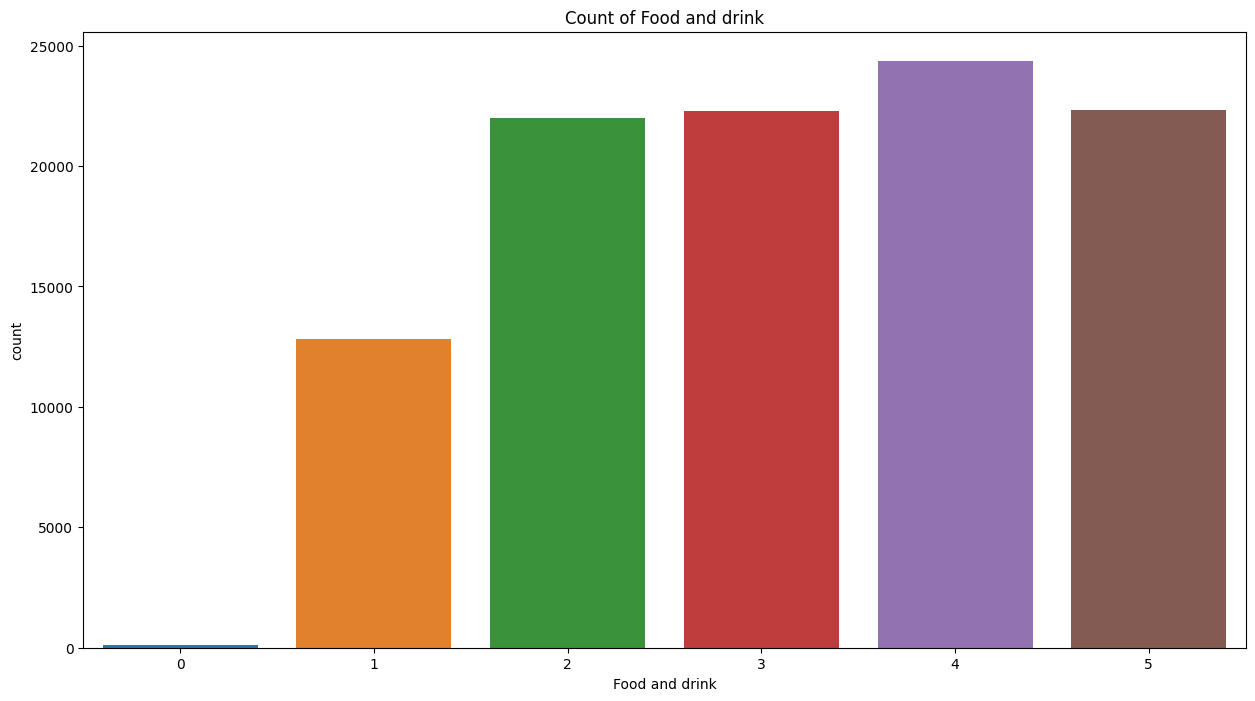

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Food and drink')
sns.countplot(data=df, x='Food and drink')

=> Tỉ lệ hài lòng về đồ ăn và nước uống cho thấy lượt vote cao nhất nằm ở 4 là Excellent nhưng ở đây có sự đồng điều giữa 2 3 5 lần lượt là Bad Good and Very good -> cho thấy rằng dịch vụ này khá ổn định

####  Baggage handling

<Axes: title={'center': 'Count of Baggage handling'}, xlabel='Baggage handling', ylabel='count'>

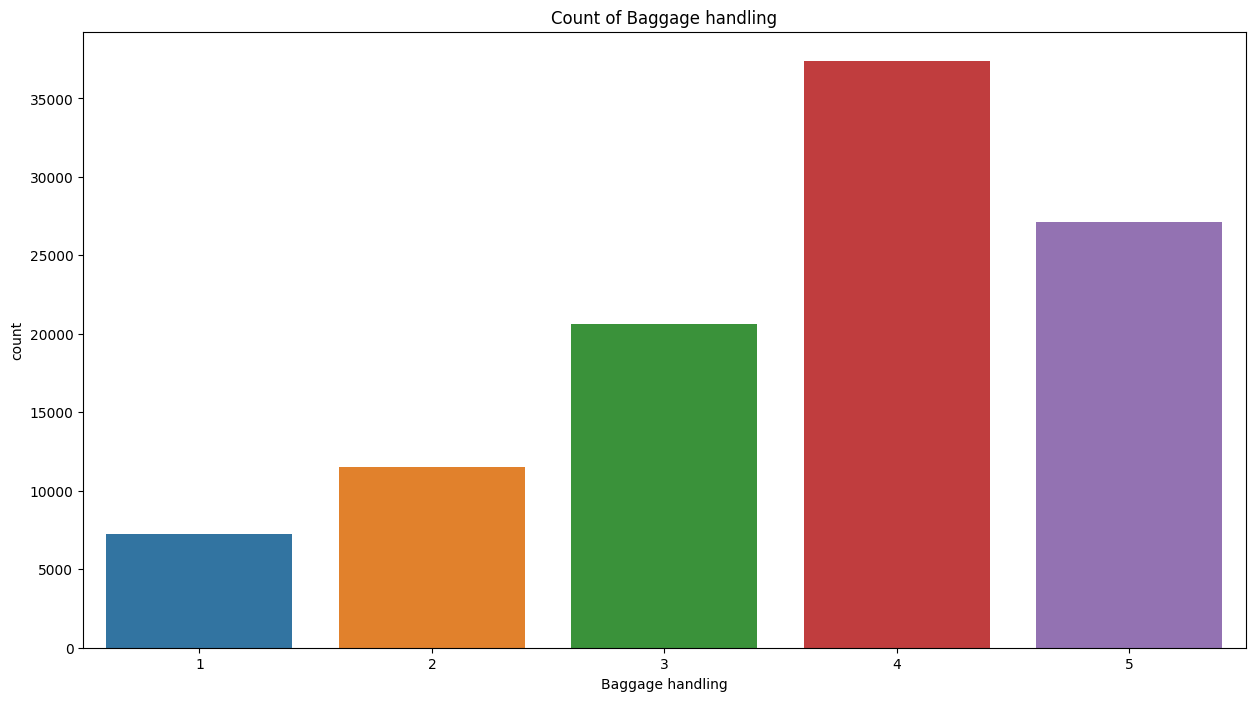

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Baggage handling')
sns.countplot(data=df, x='Baggage handling')

=> Tỉ lệ hài lòng của xử lý hành lý thì được vote cao nhất ở 4 là Excellent -> độ hài lòng dành cho dịch vụ này khá cao

#### Checkin service

<Axes: title={'center': 'Count of Checkin service'}, xlabel='Checkin service', ylabel='count'>

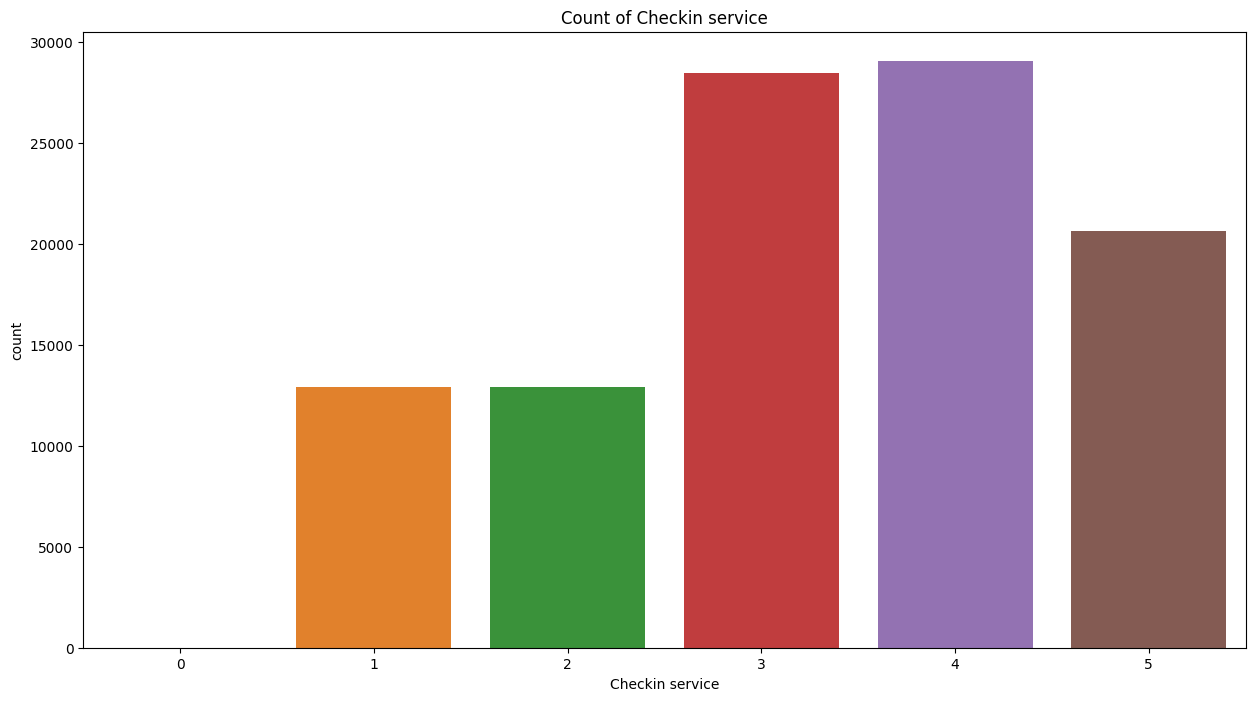

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Checkin service')
sns.countplot(data=df, x='Checkin service')

=> Tỉ lệ hài lòng của việc checkin cao nhất nằm ở 4 là Excellent và 3 là Good -> cho thấy sự hài lòng của dịch vụ này là nằm ở mức khá cao


#### Inflight service

<Axes: title={'center': 'Count of Inflight service'}, xlabel='Inflight service', ylabel='count'>

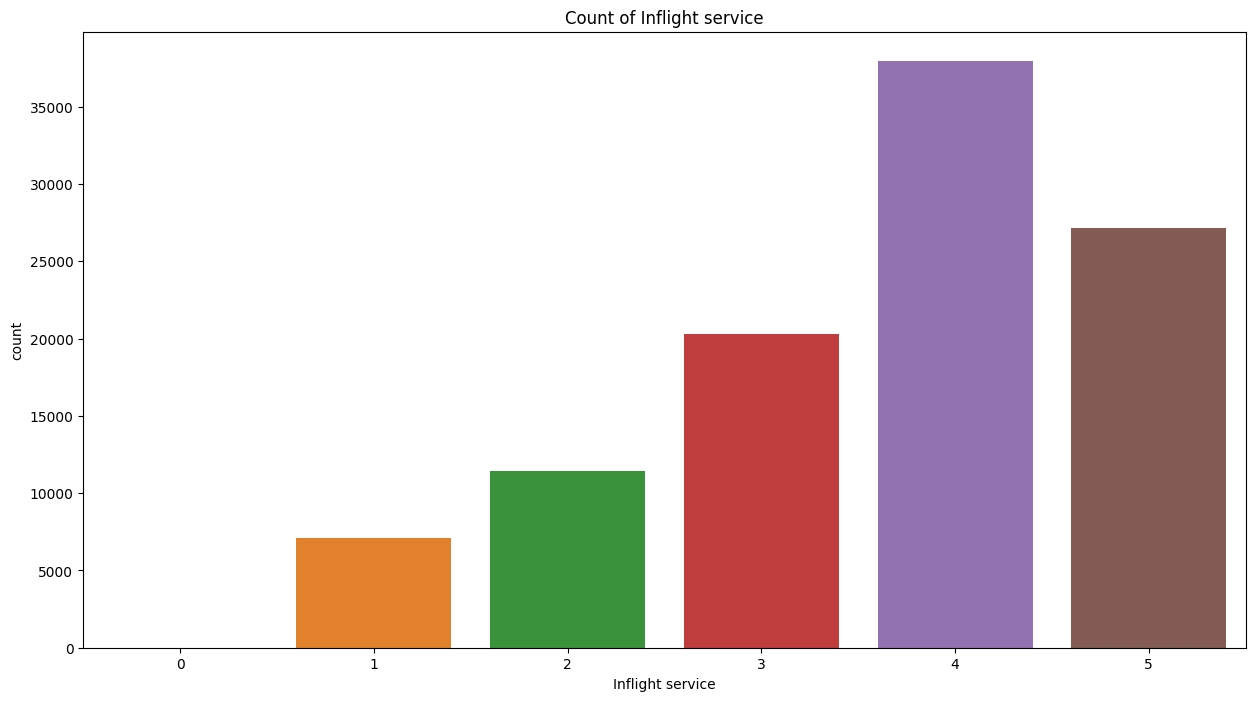

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Inflight service')
sns.countplot(data=df, x='Inflight service')

=> Tỉ lệ hài lòng về các dịch vụ trên chuyến bay được vote cao nhất 4 Excellent -> cho thấy hành khách rất hài lòng

#### Cleanliness

<Axes: title={'center': 'Count of Cleanliness'}, xlabel='Cleanliness', ylabel='count'>

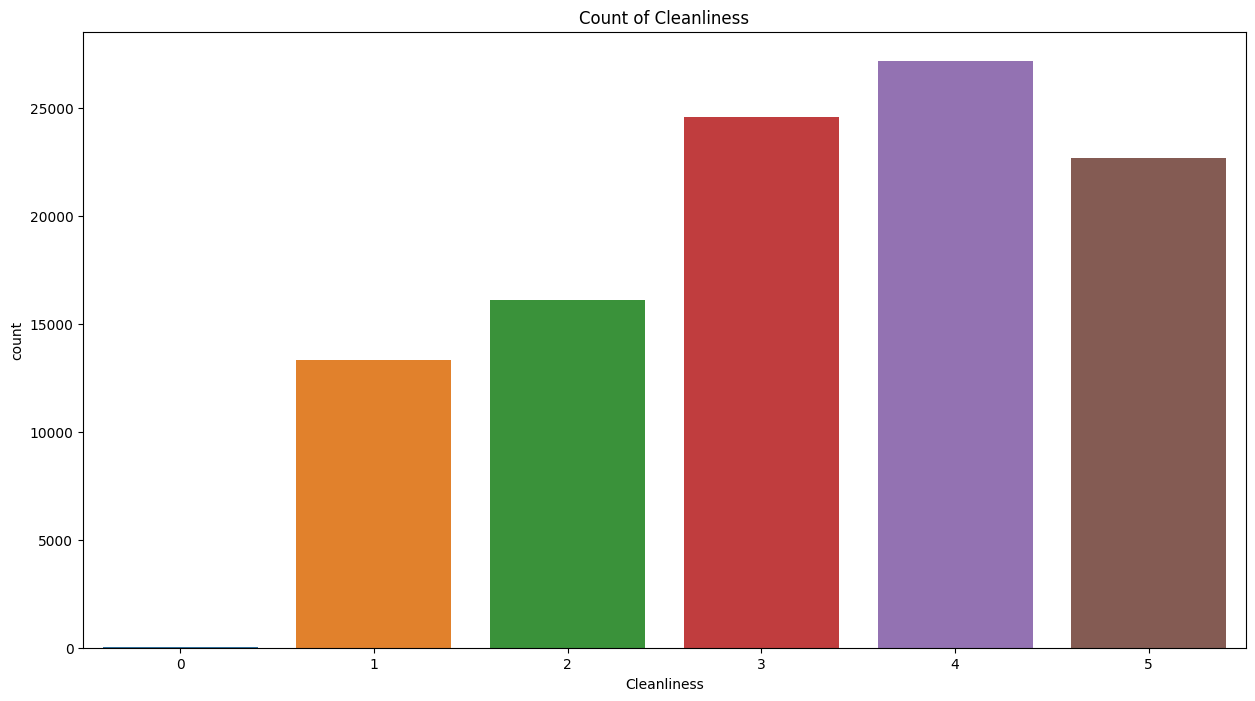

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Cleanliness')
sns.countplot(data=df, x='Cleanliness')

=> Tỉ lệ hài lòng của sự sạch sẽ vệ sinh trên máy bay khá cao được vote nhiều nhất là 4 là Excellent sau đó là 3 là Good và 5 là Very Good -> cho thấy sự hài lòng của hành khách về dịch vụ này là rất cao

#### Departure Delay and Arrival Delay

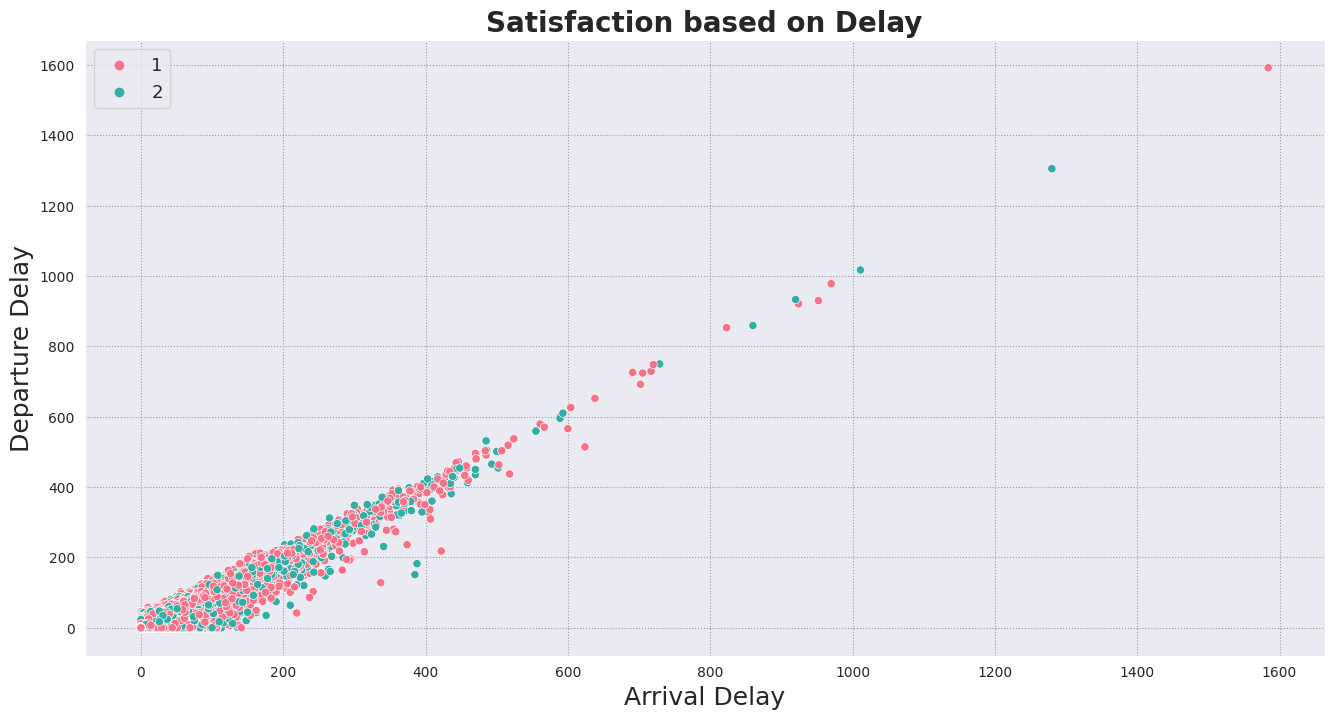

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(16,8))

plt.title('Satisfaction based on Delay',size=20,fontweight='bold')

sns.scatterplot(y='Departure Delay in Minutes',data=df,x='Arrival Delay in Minutes',hue='satisfaction',palette='husl')

plt.xlabel('Arrival Delay',size=18)
plt.ylabel('Departure Delay',size=18)

plt.legend(fontsize='13')
plt.show()

#  CORRELATION ANALYSIS

<ipython-input-48-593df4b16850>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



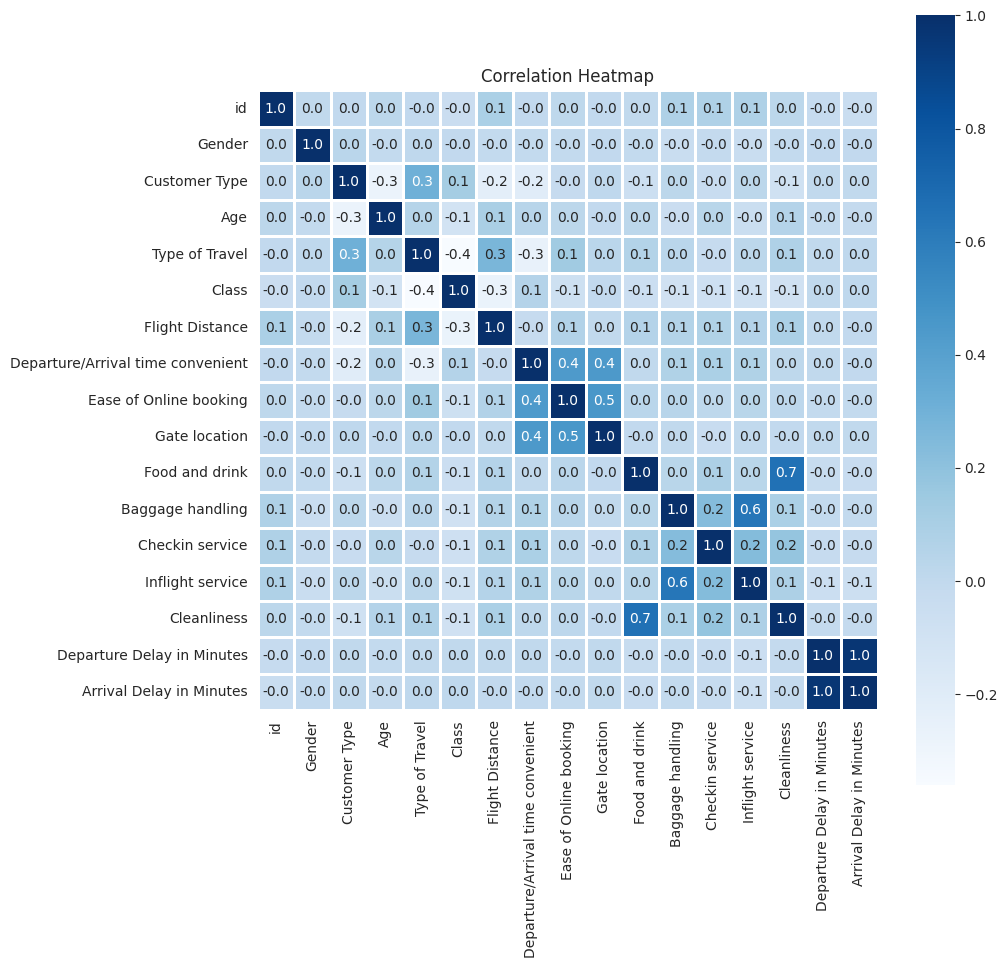

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 10))  # Set the size of the plot
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=1, fmt='.1f', square = True)
plt.title('Correlation Heatmap')
plt.show()

# DECISION TREE

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace = True)
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
# Khởi tạo bộ phân loại Cây quyết định với max_depth
dt_classifier = DecisionTreeClassifier(max_depth = 11, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_classifier.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác Cây quyết định: {accuracy}")

Độ chính xác Cây quyết định: 0.9161734276502574


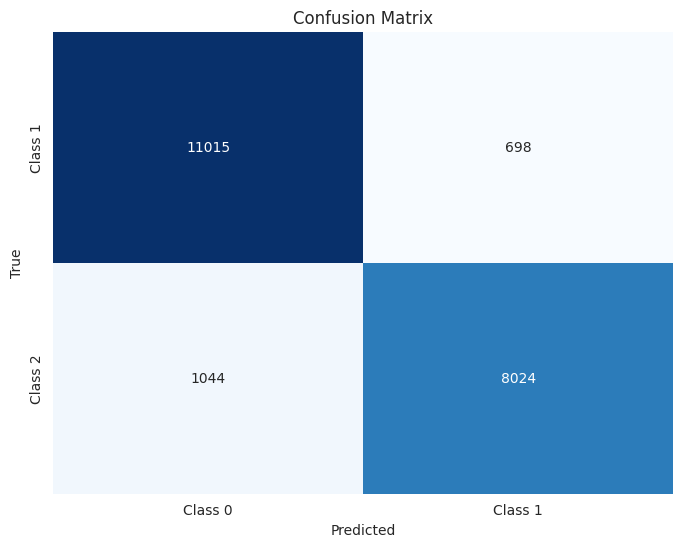

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng cách sử dụng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

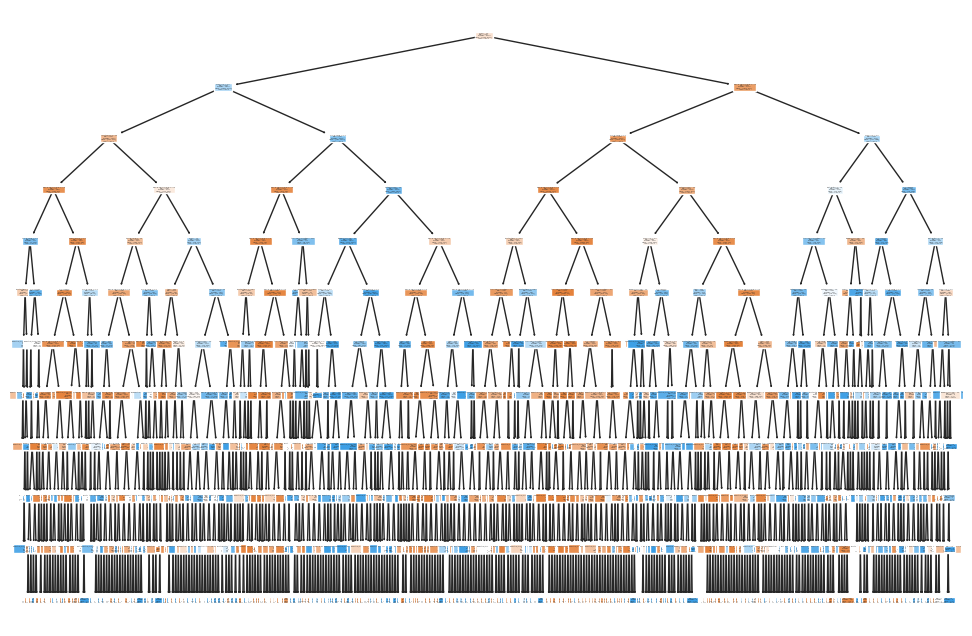

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Class 1", "Class 2"])
plt.show()

In [ ]:
#Tìm giá trị max_depth tốt nhất cho thuật toán Decision Tree
# Xác định một dãy giá trị max_depth để lặp qua
max_depth_values = range(3, 20)  # Bạn có thể điều chỉnh dãy giá trị này

# Khởi tạo biến để theo dõi max_depth tốt nhất và điểm số tương ứng
best_max_depth = None
best_score = 0.0

# Lặp qua các giá trị max_depth khác nhau
for max_depth in max_depth_values:
     # Khởi tạo DecisionTreeClassifier với max_depth hiện tại
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
     # Huấn luyện mô hình trên dữ liệu huấn luyện
    clf.fit(X_train, y_train)
    # Đánh giá mô hình trên dữ liệu kiểm tra
    test_score = clf.score(X_test, y_test)
    # Thực hiện cross-validation trên dữ liệu huấn luyện
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # In điểm số cho max_depth hiện tại
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Kiểm tra xem mô hình hiện tại có điểm số tốt hơn so với max_depth tốt nhất trước đó không
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# In ra max_depth tốt nhất và điểm số tương ứng
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.8097300418651653
Max Depth = 4: Test Score = 0.8310475915499735
Max Depth = 5: Test Score = 0.8659833501756412


In [ ]:
from sklearn.model_selection import cross_val_score
#Thực hiện kiểm định chéo 10 lần (10-fold cross-validation) cho mô hình clf
scores = cross_val_score(clf, X, y, cv=10)
# In ra điểm số từ các lượt cross-validation
print("Cross-Validation Scores:", scores)
# Trả về giá trị trung bình của các điểm số từ cross-validation, cho biết mức độ tổng quát của mô hình trên dữ liệu.
print("Mean CV Score:", scores.mean())

In [ ]:
from sklearn.tree import export_text
# Xuất biểu diễn văn bản của cây quyết định
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Tiến hành dự đoán
y_pred1 = naive_bayes.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred1)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred1)

# Hiển thị ma trận nhầm lẫn bằng một biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred1, average='weighted')
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Classification Report:\n",metrics.classification_report(y_test, y_pred1))
plt.show()

## **6. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

In [ ]:
# Dự đoán trên tập kiểm tra
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

y_pred_rf = rf_classifier.predict(X_test)

# Đánh giá mô hình
rf_train_acc = round(accuracy_score(y_train, rf_classifier.predict(X_train)) * 100, 2)
rf_test_acc = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# In kết quả
print("Training Accuracy (Random Forest):", rf_train_acc, "%")
print("Testing Accuracy (Random Forest):", rf_test_acc, "%")
print("Confusion Matrix (Random Forest):\n", cm_rf)
print("Classification Report (Random Forest):\n", classification_rep_rf)

# Vẽ heatmap của ma trận nhầm lẫn (Random Forest)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

# **7. Đánh giá**

## **7.1 Đánh giá với cây quyết định**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

## **7.2 Đánh giá Random Forest**

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# **Comparing Models**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Huấn luyện mô hình Decision Tree
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Huấn luyện mô hình Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Huấn luyện mô hình Random Forest
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Đánh giá hiệu suất của từng mô hình
dt_acc = accuracy_score(y_test, y_pred_dt)
nb_acc = accuracy_score(y_test, y_pred_nb)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Decision Tree Accuracy:", dt_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("Random Forest Accuracy:", rf_acc)

# In ma trận nhầm lẫn và báo cáo phân loại
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_rep_rf)

# Chuyển đổi nhãn từ {1, 2} thành {0, 1}
label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test.astype(int))

# Sử dụng roc_curve và auc với y_true là {0, 1}
fpr, tpr, thresholds = roc_curve(y_test_binary, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve (chỉ áp dụng cho bài toán phân loại nhị phân)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary, dt_classifier.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_binary, naive_bayes.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, rf_classifier.predict_proba(X_test)[:, 1])

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **7.3 So sánh 2 thuật toán**


### **- Decision Tree Classifier:**
+Accuracy: 0.91646

+Precision: 0.91652

+Recall: 0.91646

+F1-Score: 0.91626
### **- Random Forest Classifier:**
+Accuracy: 0.933304

+Precision: 0.933518

+Recall: 0.933304

+F1-Score: 0.933127
### **So sánh:**
- Accuracy: Random Forest (0.933304) có hiệu suất cao hơn so với Decision Tree (0.91646), đồng nghĩa với việc Random Forest dự đoán đúng tỉ lệ cao hơn trên tập dữ liệu kiểm tra.

- Precision: Precision của Decision Tree (0.933518) và Random Forest (0.91652) cũng có sự khác biệt. Precision là tỉ lệ các dự đoán dương tính đúng trên toàn bộ các dự đoán dương tính. Random Forest có Precision cao hơn, cho thấy nó có khả năng dự đoán các điểm dương tính một cách chính xác hơn.

- Recall: Cả hai mô hình có Recall tương đối gần nhau (Decision Tree: 0.91646 và Random Forest: 0.933304), cho thấy khả năng bao quát của cả hai đối với việc tìm ra tất cả các trường hợp thực sự dương tính.

- F1-Score: F1-Score kết hợp cả Precision và Recall. Random Forest ( 0.933127) có F1-Score cao hơn so với Decision Tree (0.91626), cho thấy sự cân bằng giữa Precision và Recall tốt hơn trong Random Forest.

*==> Tóm lại, Random Forest có vẻ có hiệu suất tốt hơn trên tập dữ liệu kiểm tra so với Decision Tree theo các độ đo khác nhau như Accuracy, Precision, Recall và F1-Score. Điều này có thể do khả năng tập hợp các cây quyết định trong Random Forest giúp cải thiện dự đoán so với một cây quyết định đơn lẻ trong Decision Tree.*

# **8.Documentation**

## **8.1 toàn bộ quá trình**



## **1. Tiền xử lý dữ liệu**

Chuẩn hóa dữ liệu: Sử dụng các phương pháp như Min-Max Scaling hoặc để đưa các thuộc tính về cùng một phạm vi giá trị, giúp cho mô hình học máy hội tụ nhanh hơn và đảm bảo tính ổn định.

## **2. Phương pháp phân nhóm**

### + Cây quyết định (Decision Tree)

Sử dụng mô hình cây quyết định để phân loại dữ liệu dựa trên các quy tắc quyết định tại các nút của cây.

### + Rừng ngẫu nhiên (Random Forest)

Kỹ thuật này tạo ra nhiều cây quyết định và kết hợp kết quả từ tất cả các cây để đưa ra dự đoán cuối cùng.

## **3. Điều chỉnh tham số**

Tinh chỉnh tham số : sử dụng vòng lặp để tìm độ sâu phù hợp cho cây quyết định

## **4. Trực quan hóa kết quả**

### + Biểu đồ Confusion Matrix

Dùng để đánh giá hiệu suất của mô hình bằng cách so sánh giữa giá trị dự đoán và giá trị thực tế.

### + Biểu đồ Precision-Recall hoặc ROC Curve

Sử dụng để đánh giá hiệu suất của mô hình dựa trên độ chính xác và độ phủ của mô hình.

## + Quá trình tổng quát

1. Chuẩn bị dữ liệu: Load dữ liệu vào, kiểm tra thiếu sót, và tiền xử lý (chuẩn hóa, mã hóa nếu cần).
2. Chia dữ liệu: Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra.
3. Xây dựng mô hình: Huấn luyện mô hình cây quyết định và rừng ngẫu nhiên trên tập huấn luyện.
4. Điều chỉnh tham số: Sử dụng Grid Search hoặc Random Search để điều chỉnh các tham số của mô hình.
5. Đánh giá hiệu suất: Sử dụng tập kiểm tra để đánh giá hiệu suất của mô hình thông qua các phương pháp trực quan và các metrics như confusion matrix, precision-recall, ROC curve.
6. Tối ưu và đánh giá cuối cùng: Chọn mô hình tốt nhất dựa trên hiệu suất trên tập kiểm tra và đánh giá cuối cùng trước khi triển khai.



## **8.2 Tài liệu thống kê và trả lời các câu hỏi sau:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Fit a classifier (e.g., Random Forest) and get feature importances
clf = RandomForestClassifier()
clf.fit(X, y)
feature_importances = clf.feature_importances_
print(feature_importances)

## **8.3 Xác định biến quan trọng nhất**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Lấy đặc trưng quan trọng từ mô hình
feature_importances = dt_classifier.feature_importances_

# Tạo DataFrame hiển thị đặc trưng quan trọng
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In kết quả
print(feature_importance_df)

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Dựa vào dữ liệu , biến "class" có giá trị đặc biệt cao với mức độ quan trọng là 0.226139, là biến quan trọng nhất trong danh sách. Điều này ngụ ý rằng trong bộ dữ liệu và mô hình đang xem xét, "class" có ảnh hưởng lớn nhất đến kết quả so với các biến khác.

## **8.4 ** Độ sâu tốt nhất**

In [ ]:
#Tìm giá trị max_depth tốt nhất cho thuật toán Decision Tree
# Xác định một dãy giá trị max_depth để lặp qua
max_depth_values = range(3, 20)  # Bạn có thể điều chỉnh dãy giá trị này

# Khởi tạo biến để theo dõi max_depth tốt nhất và điểm số tương ứng
best_max_depth = None
best_score = 0.0

# Lặp qua các giá trị max_depth khác nhau
for max_depth in max_depth_values:
     # Khởi tạo DecisionTreeClassifier với max_depth hiện tại
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
     # Huấn luyện mô hình trên dữ liệu huấn luyện
    clf.fit(X_train, y_train)
    # Đánh giá mô hình trên dữ liệu kiểm tra
    test_score = clf.score(X_test, y_test)
    # Thực hiện cross-validation trên dữ liệu huấn luyện
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # In điểm số cho max_depth hiện tại
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Kiểm tra xem mô hình hiện tại có điểm số tốt hơn so với max_depth tốt nhất trước đó không
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# In ra max_depth tốt nhất và điểm số tương ứng
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

  Best Max Depth = 11: Best Test Score = 0.9164621529281555

 - Kết quả cho thấy rằng điểm số trên tập kiểm tra tăng dần khi độ sâu tăng lên, nhưng sau khi đạt đến độ sâu tối đa tại mức 19, điểm số không còn tăng nữa mà duy trì ở mức cao nhất là 0.9164621529281555.

- Điều này có thể ngụ ý rằng, với tập dữ liệu và mô hình được sử dụng, việc thiết lập độ sâu của cây quyết định là 19 có thể mang lại kết quả tốt nhất trên tập kiểm tra.

## **8.5 Mô tả đặc điểm chất lượng chuyến bay**

In [ ]:
print('Class 1 : Không hài lòng')
df[df['Class']==1].describe()

In [ ]:
print('Class 2 : Hài lòng')
df[df['Class']==2].describe()